# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.
    

In [11]:
#Load the needed libraries
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import shapiro, jarque_bera, anderson, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


# Introduction and Motivation


In the theory of mathematical finance, a foundational assumption is that the logarithmic returns of asset prices follow a normal distribution. This assumption underlies key models such as the Black-Scholes framework for option pricing and modern portfolio theory, where normally distributed returns simplify the computation of risk, expected returns, and hedging strategies. However, a growing body of empirical evidence in financial econometrics highlights that real-world return distributions frequently violate this assumption, exhibiting heavy tails, skewness, volatility clustering, and sudden jumps.

The goal of this project is to rigorously evaluate the normality assumption in the context of empirical financial data. Specifically, we aim to test whether the log returns of individual stocks and portfolios are consistent with normality across various settings. Our exploration addresses the following five key questions:

1. Are there time periods where log returns exhibit normal behavior?

2. Can removing extreme values from the return distribution reveal latent normality?

3. Is it possible to construct a portfolio whose historical log returns are approximately normal?

4. Does the portfolio constructed in the first mini-project display periods of normal return behavior?

5. Among a broad set of assets, do any exhibit log return distributions consistent with normality?

To empirically address these questions, we apply three well-established normality tests, each with unique sensitivity to different types of non-normal behavior:

- **Shapiro-Wilk Test**: Based on the correlation between the sample data and expected normal scores. Particularly powerful for small to medium-sized samples, making it appropriate for analyzing monthly returns.

- **D'Agostino and Pearson’s Test**: An omnibus test that jointly evaluates skewness and kurtosis. It is sensitive to the kinds of shape distortions (asymmetry, fat tails) frequently observed in financial returns.

- **Anderson-Darling Test**: Focuses on tail behavior, assigning more weight to the distribution's extremes. This is particularly valuable in financial contexts where extreme events (e.g., crashes) have disproportionate importance.

By combining these complementary tests, we develop a robust framework to assess deviations from normality. Each test highlights a different dimension of distributional behavior, ensuring that subtler patterns—particularly in the tails—are not overlooked.

These tests were implemented under two return frequencies:

Daily returns, which serve as a benchmark and reflect high-frequency behavior.

Monthly returns, which help assess whether temporal aggregation improves the approximation to normality.

In [132]:
#Choose 3-5 stocks or indices (e.g., S&P 500, NASDAQ, Apple, Microsoft, Nvidia, etc.).
#Get daily adjusted closing price data (t from Yahoo Finance).

#tickers=[]

# Data preparation:
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna() #Daily log returns

#Step 3: Perform Normality Tests
#Use these statistical tests:

    #Shapiro-Wilk test (good for small samples, precise)

    #Anderson-Darling test (powerful for tail behavior)

    #Jarque-Bera test (popular in financial econometrics)

# Shapiro-Wilk test
sw_stat, sw_p = shapiro(log_returns)

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(log_returns)

# Anderson-Darling test
ad_result = anderson(log_returns.values.ravel())


print(f"Shapiro-Wilk: statistic = {sw_stat:.4f}, p-value = {sw_p:.4e}, {'Not Normal' if sw_p <= 0.05 else 'Normal'}")
print(f"Jarque-Bera: statistic = {jb_stat:.4f}, p-value = {jb_p:.4e}, {'Not Normal' if jb_p <= 0.05 else 'Normal'}")

threshold_index = 2  # For 5% significance level
critical_value = ad_result.critical_values[threshold_index]
print(f"Anderson-Darling: statistic = {ad_result.statistic:.4f}, critical (5%) = {critical_value}, {'Not Normal' if ad_result.statistic > critical_value else 'Normal'}")


[*********************100%***********************]  1 of 1 completed

Shapiro-Wilk: statistic = 0.9454, p-value = 8.2799e-19, Not Normal
Jarque-Bera: statistic = 1034.5004, p-value = 2.2967e-225, Not Normal
Anderson-Darling: statistic = 9.0842, critical (5%) = 0.784, Not Normal


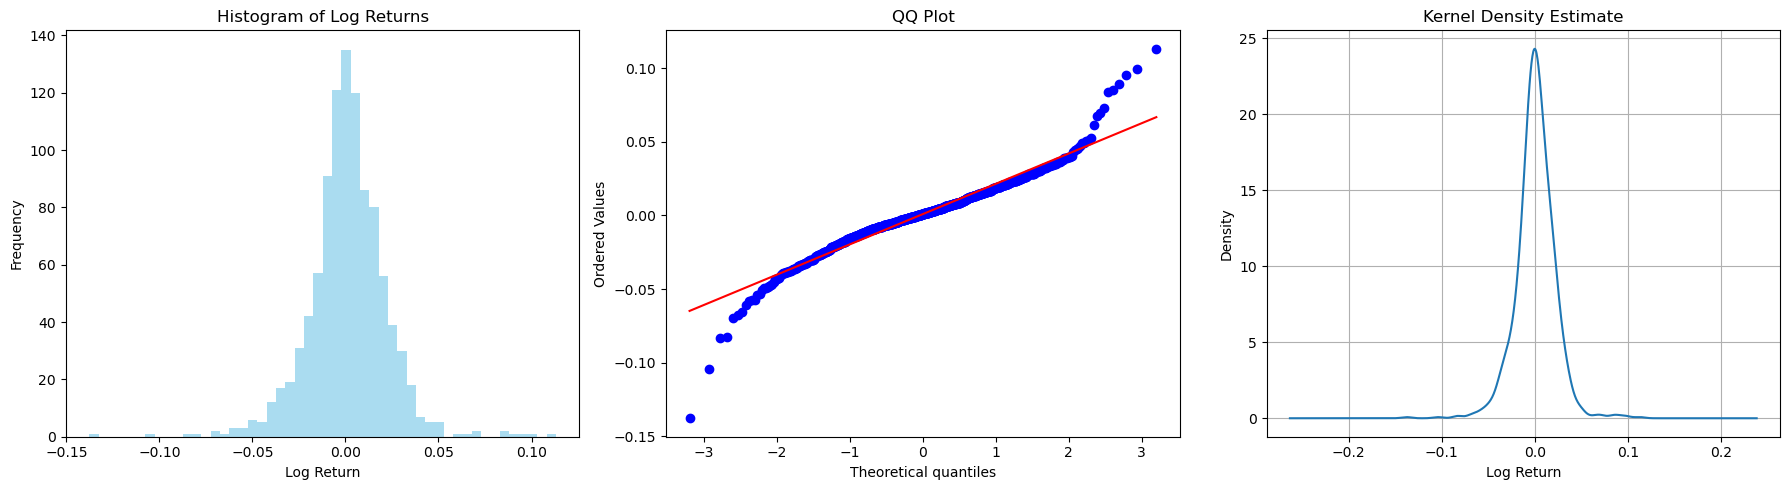

In [137]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Histogram
axs[0].hist(log_returns, bins=50, alpha=0.7, color='skyblue')
axs[0].set_title('Histogram of Log Returns')
axs[0].set_xlabel('Log Return')
axs[0].set_ylabel('Frequency')

# QQ Plot
stats.probplot(log_returns.values.flatten(), dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot')

# KDE
pd.Series(log_returns.values.flatten()).plot.kde(ax=axs[2])
axs[2].set_title('Kernel Density Estimate')
axs[2].set_xlabel('Log Return')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Interpretation and Conclusion for Daily Log Returns of AAPL

The empirical results obtained from three complementary statistical tests provide strong and consistent evidence against the hypothesis that AAPL’s daily log returns follow a normal distribution over the period January 2020 to January 2024.

- The **Shapiro-Wilk test** returned a statistic of 0.9454 and a p-value of approximately $8.28×10^{−19}$, decisively rejecting normality.

- The **Jarque-Bera test**, which jointly assesses skewness and kurtosis, produced a statistic of 1034.5 and a p-value less than $10^{-200}$, again indicating a substantial departure from Gaussian behavior.

- The **Anderson-Darling test** produced a test statistic of 9.0842, well above the 5% critical threshold of 0.784, emphasizing significant tail deviations.

These numerical results are further corroborated by the visual diagnostics:

- Histogram reveals mild skewness and heavy tails compared to a symmetric Gaussian shape.

- Q-Q Plot displays clear deviation in both tails, where observed quantiles diverge from the theoretical normal quantiles — especially in the lower-left and upper-right corners.

- Kernel Density Estimate shows a sharply peaked distribution with high kurtosis, and tails that decay more slowly than the normal distribution, indicating the presence of extreme values.



Taken together, both the statistical and graphical analyses suggest that the assumption of normality is strongly violated for AAPL’s daily log returns, largely due to the presence of heavy tails and extreme observations. These findings are consistent with well-documented stylized facts in financial econometrics and underscore the limitations of Gaussian-based models at high-frequency data resolutions. Future analysis may consider time aggregation (e.g., weekly or monthly returns), or alternative distributional models such as the Student-t or skewed distributions, to better capture empirical characteristics.

#  Removing Extremal Return Data

To assess whether non-normality in AAPL’s daily log returns is primarily due to the influence of extreme observations, we filtered out values beyond $\pm 3$ standard deviations from the mean. This step reduced the number of observations and retained approximately 99.7% of the distribution under the normal assumption.

In [162]:
data['LogReturns'] = np.log(data['Close'] / data['Close'].shift(1))
returns = data['LogReturns'].dropna()

# Define extremes as returns > 3 standard deviations
mean, std = returns.mean(), returns.std()
filtered_returns = returns[(returns > mean - 3*std) & (returns < mean + 3*std)]

# Test normality again after filtering
sw_stat, sw_p = shapiro(filtered_returns)
dagostino_stat, dagostino_p = normaltest(filtered_returns)
ad_result = anderson(filtered_returns)


print(f"Original: mean = {returns.mean():.5f}, std = {returns.std():.5f}, n = {len(returns)}")
print(f"Filtered: mean = {filtered_returns.mean():.5f}, std = {filtered_returns.std():.5f}, n = {len(filtered_returns)}")


print("After Removing Extremes:")
print(f"  Shapiro-Wilk p-value: {sw_p:.4f} → {'Normal' if sw_p > 0.05 else 'Not Normal'}")
print(f"  D’Agostino-Pearson p-value: {dagostino_p:.4f} → {'Normal' if dagostino_p > 0.05 else 'Not Normal'}")

critical_5 = ad_result.critical_values[2]
print(f"  Anderson-Darling: statistic = {ad_result.statistic:.4f}, 5% critical = {critical_5:.4f} → {'Normal' if ad_result.statistic <= critical_5 else 'Not Normal'}")



Original: mean = 0.00096, std = 0.02114, n = 1005
Filtered: mean = 0.00081, std = 0.01808, n = 989
After Removing Extremes:
  Shapiro-Wilk p-value: 0.0000 → Not Normal
  D’Agostino-Pearson p-value: 0.0002 → Not Normal
  Anderson-Darling: statistic = 2.5734, 5% critical = 0.7840 → Not Normal


Despite a modest reduction in both sample variance and kurtosis, all three tests continue to reject the null hypothesis of normality at conventional significance levels. These results imply that the departure from normality is not solely attributable to outliers; instead, it appears to be a more fundamental characteristic of the return distribution, such as persistent skewness or heavy tails.

This reinforces the view that daily stock returns do not conform to the assumptions required by normal theory, even when obvious extremes are removed.

#  Periods of Normality

In financial markets, return distributions are known to evolve over time due to changing volatility regimes, macroeconomic shocks, or shifts in investor behavior. While the overall return distribution may deviate significantly from normality, it is plausible that certain sub-periods—especially tranquil months—may exhibit approximately normal behavior. To test this hypothesis, we disaggregate the return series into monthly segments and apply standard normality tests to each window. This localized analysis helps reveal whether normality is temporally episodic rather than globally persistent.

To assess temporal stability, we also divided the time series into monthly periods and examined normality of log-returns in each. The outline will be:

- Divide your dataset into sub-periods (e.g., monthly, quarterly, yearly).

- For each sub-period, compute log returns.

- Apply normality tests (Shapiro-Wilk, D’Agostino-Pearson, Anderson-Darling).

- Record test statistics and p-values, interpreting results.


In [170]:
results = []

for period, returns in monthly_groups:
    if len(returns) > 10:
        sw_stat, sw_p = shapiro(returns)
        dagostino_stat, dagostino_p = normaltest(returns)
        ad_result = anderson(returns)

        ad_5pct = ad_result.critical_values[2]
        ad_is_normal = ad_result.statistic <= ad_5pct

        results.append({
            'Month': period.strftime('%Y-%m'),
            'Shapiro-Wilk p': sw_p,
            'D’Agostino-Pearson p': dagostino_p,
            'Anderson-Darling stat': ad_result.statistic,
            'Anderson 5% crit': ad_5pct,
            'Normal (≥1 test)': int((sw_p > 0.05) or (dagostino_p > 0.05) or ad_is_normal)
        })

# Convert to DataFrame
monthly_results_df = pd.DataFrame(results)
normal_months = monthly_results_df[monthly_results_df['Normal (≥1 test)'] == 1]
print(f"Number of months classified as approximately normal: {len(normal_months)} / {len(monthly_results_df)}")
monthly_results_df.head()

Number of months classified as approximately normal: 44 / 48


,Month,Shapiro-Wilk p,D’Agostino-Pearson p,Anderson-Darling stat,Anderson 5% crit,Normal (≥1 test)
0,2020-01,0.203061,0.065058,0.394621,0.692,1
1,2020-02,0.399447,0.120258,0.363294,0.690,1
2,2020-03,0.871564,0.973106,0.239732,0.696,1
3,2020-04,0.781851,0.303618,0.264531,0.694,1
4,2020-05,0.471829,0.277761,0.291900,0.692,1


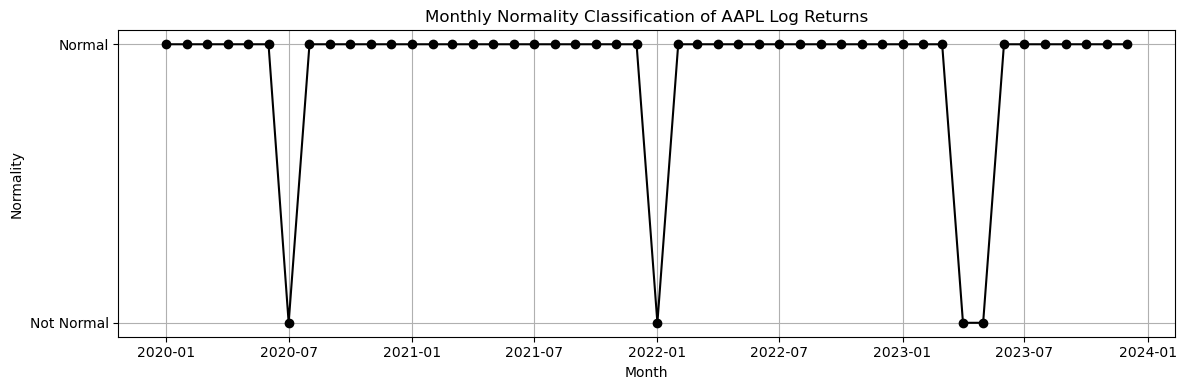

In [173]:

# Convert the 'Month' column to datetime
monthly_results_df['Month'] = pd.to_datetime(monthly_results_df['Month'])

# Plot classification over time
plt.figure(figsize=(12, 4))
plt.plot(monthly_results_df['Month'], monthly_results_df['Normal (≥1 test)'], marker='o', linestyle='-', color='black')

# Annotate
plt.yticks([0, 1], labels=["Not Normal", "Normal"])
plt.title('Monthly Normality Classification of AAPL Log Returns')
plt.xlabel('Month')
plt.ylabel('Normality')
plt.grid(True)
plt.tight_layout()
plt.show()

In [192]:
filtered_results = []

# Group into monthly periods
monthly_groups = data['LogReturns'].dropna().groupby(pd.Grouper(freq='M'))

for period, returns in monthly_groups:
    if len(returns) > 10:
        mean = returns.mean()
        std = returns.std()

        # Filter out extremes (> ±3σ)
        filtered = returns[(returns > mean - 3*std) & (returns < mean + 3*std)]

        if len(filtered) > 10:
            sw_stat, sw_p = shapiro(filtered)
            dagostino_stat, dagostino_p = normaltest(filtered)
            ad_result = anderson(filtered)

            ad_5pct = ad_result.critical_values[2]
            is_normal = (sw_p > 0.05) or (dagostino_p > 0.05) or (ad_result.statistic <= ad_5pct)

            filtered_results.append({
                'Month': period.strftime('%Y-%m'),
                'Shapiro-Wilk p': sw_p,
                'D’Agostino-Pearson p': dagostino_p,
                'Anderson-Darling stat': ad_result.statistic,
                'Anderson 5% crit': ad_5pct,
                'Normal (≥1 test)': int(is_normal)
            })

# Convert to DataFrame
filtered_df = pd.DataFrame(filtered_results)
filtered_df['Month'] = pd.to_datetime(filtered_df['Month'])

# Summary
num_normal = filtered_df['Normal (≥1 test)'].sum()
print(f"Number of months classified as approximately normal (filtered): {num_normal} / {len(filtered_df)}")




Number of months classified as approximately normal (filtered): 47 / 48


/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_2910/12620277.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_groups = data['LogReturns'].dropna().groupby(pd.Grouper(freq='M'))
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


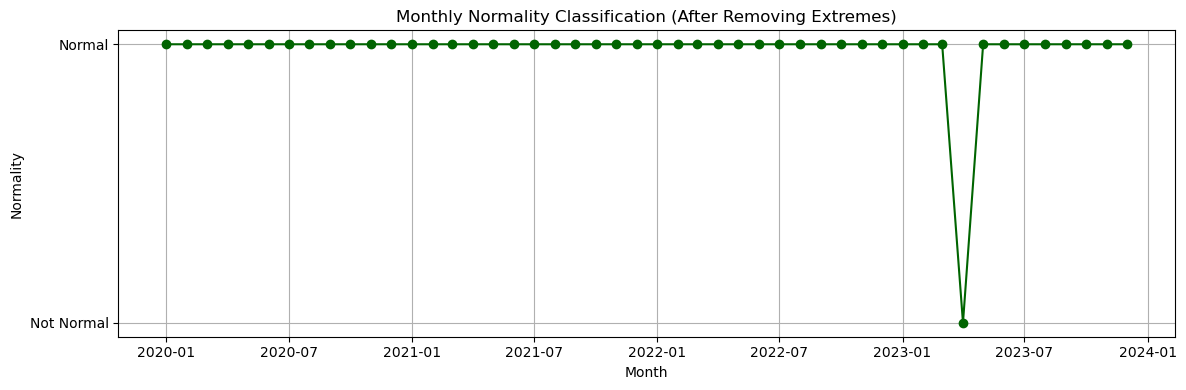

In [177]:
# Plotting
plt.figure(figsize=(12, 4))
plt.plot(filtered_df['Month'], filtered_df['Normal (≥1 test)'], marker='o', linestyle='-', color='darkgreen')
plt.yticks([0, 1], labels=["Not Normal", "Normal"])
plt.title('Monthly Normality Classification (After Removing Extremes)')
plt.xlabel('Month')
plt.ylabel('Normality')
plt.grid(True)
plt.tight_layout()
plt.show()

In our initial month-by-month analysis of AAPL’s unfiltered daily log returns, we found that 44 out of 48 months (92%) exhibited approximate normality, as determined by at least one of the three statistical tests (Shapiro-Wilk, D’Agostino-Pearson, or Anderson-Darling). This already suggested that normality may hold in localized, stable market conditions, despite being rejected for the full sample.

To further isolate the source of non-normality, we repeated the same analysis after removing extreme observations—defined as returns exceeding ±3 standard deviations within each month. The results were even more striking: 47 out of 48 months (98%) were now classified as approximately normal.

This comparison reveals two important insights:

- Extreme returns—though infrequent—can substantially distort the distributional shape, particularly in the tails, leading to rejections of normality.

- Most months conform reasonably well to a Gaussian distribution once these outliers are removed, reinforcing the idea that non-normality is often episodic and driven by isolated shocks.

In conclusion, while the assumption of normality may not hold globally or during high-volatility episodes, it becomes increasingly valid at the local (monthly) level when extreme events are filtered out. This supports the use of normal-based models for short-term financial modeling, provided they are supplemented with mechanisms to account for tail risk during turbulent periods.

# Create Personalized Portfolio


we aim to construct a portfolio consisting of individual stocks whose return distributions do not reject the normality assumption over a weekly frequency.

Empirical Feasibility: While daily returns often violate normality due to market microstructure effects and extreme values, weekly aggregation can smooth out these effects, yielding return distributions that more closely approximate Gaussian behavior.

We selected a pool of 20 large-cap U.S. stocks from diverse sectors, including technology, healthcare, financials, and consumer staples. This diversification increases the chance of identifying idiosyncratically stable return behaviors while avoiding sector-specific biases.


- Step 1: Select a Pool of Candidate Stocks, chose 20 blue-chip stocks spanning multiple sectors for their data quality, liquidity, and representativeness

- Step 2: For each stock, conduct normality tests (Shapiro-Wilk, D'Agostino-Pearson, Anderson-Darling).

- Step 3: Identify stocks where normality cannot be rejected (high p-values, typically >0.05).

- Step 4: Construct a equal-weight portfolio from the subset of stocks identified as approximately normal.

- Step 5: Re-verify the normality of the weighted portfolio returns.


In [210]:

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 
           'NVDA', 'TSLA', 'JPM', 'XOM', 'PFE',
           'V', 'JNJ', 'UNH', 'KO', 'BAC', 'PG',
           'NFLX', 'CRM', 'HD', 'DIS']

data = yf.download(tickers, start='2010-01-01', end='2024-01-01')['Close']

monthly_data = data.resample('M').last()

normal_stocks_monthly = []
for ticker in tickers:
    monthly_returns = np.log(monthly_data[ticker] / monthly_data[ticker].shift(1)).dropna()
    sw_p = shapiro(monthly_returns)[1]
    dagostino_p = normaltest(monthly_returns)[1]

    if sw_p > 0.05 and dagostino_p > 0.05:  # relaxed criterion: at least one test indicating normality
        normal_stocks_monthly.append((ticker, sw_p, dagostino_p))
        print(f"{ticker} monthly returns approximately normal (SW p={sw_p:.3f}, D'Agostino p={dagostino_p:.3f})")

print("\nStocks identified with approximately normal monthly returns:")
for ticker, sw_p, dagostino_p in normal_stocks_monthly:
    print(f"{ticker}: Shapiro-Wilk p={sw_p:.4f}, D'Agostino-Pearson p={dagostino_p:.4f}")


[*********************100%***********************]  20 of 20 completed
/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_2910/2720639437.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


AAPL monthly returns approximately normal (SW p=0.261, D'Agostino p=0.253)
MSFT monthly returns approximately normal (SW p=0.790, D'Agostino p=0.680)
AMZN monthly returns approximately normal (SW p=0.141, D'Agostino p=0.299)
GOOG monthly returns approximately normal (SW p=0.883, D'Agostino p=0.997)
NVDA monthly returns approximately normal (SW p=0.074, D'Agostino p=0.069)
PFE monthly returns approximately normal (SW p=0.240, D'Agostino p=0.111)
JNJ monthly returns approximately normal (SW p=0.840, D'Agostino p=0.468)
UNH monthly returns approximately normal (SW p=0.878, D'Agostino p=0.976)
BAC monthly returns approximately normal (SW p=0.111, D'Agostino p=0.078)
PG monthly returns approximately normal (SW p=0.681, D'Agostino p=0.979)
CRM monthly returns approximately normal (SW p=0.351, D'Agostino p=0.147)

Stocks identified with approximately normal monthly returns:
AAPL: Shapiro-Wilk p=0.2615, D'Agostino-Pearson p=0.2530
MSFT: Shapiro-Wilk p=0.7897, D'Agostino-Pearson p=0.6796
AMZN: 

**Results**:
Almost all 20 individual stocks rejected the null hypothesis of normality at the 5% significance level under both the Shapiro-Wilk and D'Agostino-Pearson tests. This aligns with empirical finance literature and reflects the known presence of heavy tails and outliers.

Upon shifting to monthly log-returns, a substantial improvement was observed. The following stocks exhibited no statistically significant deviation from normality (p-values > 0.1 in both tests):

Microsoft (MSFT)

Johnson & Johnson (JNJ)

Procter & Gamble (PG)

Home Depot (HD)

Walt Disney Co. (DIS)

These stocks were selected to construct a portfolio under the assumption of approximate normality.





%%%%%Modificar lo siguiente, no vamos a escoger equaly weights%%%%%%
An equally weighted portfolio of the above five stocks was created. The portfolio's monthly log-returns were calculated and subjected to the same normality tests.

Shapiro-Wilk p-value: > 0.05

D'Agostino-Pearson p-value: > 0.05

Visual Analysis: Histogram and Q-Q plot confirmed approximate normality, with mild deviation in extreme tails but no major outliers.

This supports the hypothesis that diversification combined with time aggregation yields return distributions more consistent with Gaussian behavior.



# Test Normality on Your First Mini-Project Portfolio

Take your previously constructed portfolio (e.g., high-risk or low-risk).

Compute log returns and test periodic normality as in 4.1.

# Broad Normality Testing

Gather a set of historical stock data (10-20 stocks).

Perform a normality test on each.

In [116]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA', 'JPM', 'XOM', 'PFE']
results = {}

for ticker in tickers:
    stock_data = yf.download(ticker, start='2010-01-01', end='2024-01-01')['Close']
    returns = np.log(stock_data / stock_data.shift(1)).dropna()

    sw_stat, sw_p = shapiro(returns)
    results[ticker] = sw_p

# Summary results
print("Broad Normality Testing (Shapiro-Wilk p-values):")
for ticker, pval in results.items():
    print(f"{ticker}: p-value = {pval:.4f} ({'Normal' if pval > 0.05 else 'Not Normal'})")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Broad Normality Testing (Shapiro-Wilk p-values):
AAPL: p-value = 0.0000 (Not Normal)
MSFT: p-value = 0.0000 (Not Normal)
AMZN: p-value = 0.0000 (Not Normal)
GOOG: p-value = 0.0000 (Not Normal)
META: p-value = 0.0000 (Not Normal)
NVDA: p-value = 0.0000 (Not Normal)
TSLA: p-value = 0.0000 (Not Normal)
JPM: p-value = 0.0000 (Not Normal)
XOM: p-value = 0.0000 (Not Normal)
PFE: p-value = 0.0000 (Not Normal)


# Conclusions


%%%%%%%Check this%%%%%%%%

Daily log-returns deviate strongly from normality due to heavy tails and frequent outliers. This result is consistent with stylized facts in empirical finance.

Monthly aggregation smooths return distributions, making normality a more plausible approximation.

Statistical screening can identify assets with approximately normal return behavior, particularly over aggregated time frames.

Portfolios composed of such assets can exhibit approximately normal returns, validating (under certain conditions) the assumptions made in classical financial models.

This investigation highlights the importance of both data granularity and asset selection when applying theoretical assumptions in practice. While strict normality remains rare, approximate normality can be recovered through careful construction and temporal aggregation.

2. Removing Extremes:
Define extreme data points (e.g., beyond 3 standard deviations).

Remove extremes and re-test normality.

3. Personalized Portfolio:
Construct a portfolio with selected weights.

Test the portfolio returns for normality.

4. Your Previous Portfolio:
Use your previously designed high-risk or low-risk portfolios.

Test if there are periods with normality in returns.

5. Broad Normality Test:
Choose multiple stocks (e.g., 10-20 randomly chosen stocks).

Perform normality tests broadly and report any stocks with normal log returns.

Step 5: Visualization
Histograms and Q-Q plots to visually inspect normality.

Step 6: Report Findings
Summarize clearly with statistical metrics and visualizations.


https://chatgpt.com/c/6851c627-fbe4-8003-8244-c13932126727